In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google.cloud import bigquery
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)    # Show all rows



load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))



In [20]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/temps_reading_counts.sql", 'r') as file:
    temps_counts_read = file.read()

temps_counts_result = client.query(temps_counts_read).to_dataframe()
temps_counts_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id
0,72154
1,84129
2,71298
3,61522
4,70330
...,...
17616,93510
17617,58653
17618,65161
17619,89192


In [21]:
# Remove duplicates based on 'linkorderid'
patients_with_temps_reading = temps_counts_result.drop_duplicates(subset='subject_id')

# Display the resulting dataframe
patients_with_temps_reading


,subject_id
0,72154
1,84129
2,71298
3,61522
4,70330
...,...
17616,93510
17617,58653
17618,65161
17619,89192


In [27]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/fnhtr_symtoms.sql", 'r') as file:
    FNHTR_symptoms_read = file.read()

FNHTR_symptoms_result = client.query(FNHTR_symptoms_read).to_dataframe()
FNHTR_symptoms_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,linkorderid,unique_transfusion_events,symptom_mentioned,symptom_count
0,975,3420920,1,Chills,1
1,975,5955165,1,Chills,1
2,975,9158452,1,Chills,1
3,1709,9656798,1,Chills,5
4,2387,3931117,1,Chills,2
...,...,...,...,...,...
764,99054,7649153,1,Chills,4
765,99054,9963533,1,Chills,4
766,99256,2752634,1,Chills,1
767,99256,8020115,1,Chills,1


In [28]:
# Remove duplicates based on 'linkorderid'
unique_tranfusions_rection_counts_from_symps = FNHTR_symptoms_result.drop_duplicates(subset='linkorderid')

# Display the resulting dataframe
unique_tranfusions_rection_counts_from_symps


,subject_id,linkorderid,unique_transfusion_events,symptom_mentioned,symptom_count
0,975,3420920,1,Chills,1
1,975,5955165,1,Chills,1
2,975,9158452,1,Chills,1
3,1709,9656798,1,Chills,5
4,2387,3931117,1,Chills,2
...,...,...,...,...,...
764,99054,7649153,1,Chills,4
765,99054,9963533,1,Chills,4
766,99256,2752634,1,Chills,1
767,99256,8020115,1,Chills,1


In [9]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/fnhtr_temps.sql", 'r') as file:
    FNHRT_temps_read = file.read()

FNHRT_temps_result = client.query(FNHRT_temps_read).to_dataframe()
FNHRT_temps_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.60,96.8,Temperature rise ≥1°C (1.8°F) above baseline
1,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-12 00:00:00,98.70,96.8,Temperature rise ≥1°C (1.8°F) above baseline
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.50,97.5,Temperature rise ≥1°C (1.8°F) above baseline
3,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 12:00:00,100.20,97.5,Temperature rise ≥1°C (1.8°F) above baseline
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.40,99.6,Temperature ≥38°C (100.4°F)
...,...,...,...,...,...,...,...,...,...
11674,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-15 22:00:00,103.40,102.6,Temperature ≥38°C (100.4°F)
11675,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-15 23:00:00,103.70,102.6,Temperature ≥38°C (100.4°F)
11676,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-16 01:00:00,104.70,102.6,Temperature ≥38°C (100.4°F)
11677,9999629,85055,169373,257999,2130-12-26 05:27:00,2130-12-26 06:00:00,93.74,91.5,Temperature rise ≥1°C (1.8°F) above baseline


In [29]:
# Remove duplicates based on 'linkorderid'
unique_tranfusions_rection_counts_from_temp = FNHRT_temps_result.drop_duplicates(subset='linkorderid')

# Display the resulting dataframe
unique_tranfusions_rection_counts_from_temp



,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.60,96.80,Temperature rise ≥1°C (1.8°F) above baseline
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.50,97.50,Temperature rise ≥1°C (1.8°F) above baseline
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.40,99.60,Temperature ≥38°C (100.4°F)
5,6667,53821,191606,239463,2172-10-28 05:00:00,2172-10-28 05:00:00,98.60,96.60,Temperature rise ≥1°C (1.8°F) above baseline
11,8753,55281,151991,298476,2156-12-19 09:35:00,2156-12-19 12:45:00,100.60,98.30,Temperature ≥38°C (100.4°F)
...,...,...,...,...,...,...,...,...,...
11661,9993373,95343,128581,276735,2130-03-22 00:30:00,2130-03-22 00:50:00,101.60,99.20,Temperature ≥38°C (100.4°F)
11667,9994143,98476,161182,201485,2115-01-19 06:53:00,2115-01-19 10:55:00,95.40,93.50,Temperature rise ≥1°C (1.8°F) above baseline
11668,9994676,48939,139380,270705,2187-08-17 13:15:00,2187-08-17 17:00:00,98.80,95.36,Temperature rise ≥1°C (1.8°F) above baseline
11673,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-16 00:00:00,103.80,102.60,Temperature ≥38°C (100.4°F)


In [10]:
# Combine the two dataframes by concatenating them (adding rows)
combined_result = pd.concat([FNHRT_temps_result, FNHTR_symptoms_result], ignore_index=True)

# Display the combined result
combined_result


,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria,unique_transfusion_events,symptom_mentioned,symptom_count
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.6,96.8,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
1,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-12 00:00:00,98.7,96.8,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.5,97.5,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
3,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 12:00:00,100.2,97.5,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.4,99.6,Temperature ≥38°C (100.4°F),<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
12443,7649153,99054,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,4
12444,9963533,99054,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,4
12445,2752634,99256,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,1
12446,8020115,99256,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,1


In [31]:
# Remove duplicates based on 'linkorderid'
unique_tranfusions = combined_result.drop_duplicates(subset='linkorderid')

# Display the resulting dataframe
unique_tranfusions


,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria,unique_transfusion_events,symptom_mentioned,symptom_count
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.6,96.8,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.5,97.5,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.4,99.6,Temperature ≥38°C (100.4°F),<NA>,NaN,<NA>
5,6667,53821,191606,239463,2172-10-28 05:00:00,2172-10-28 05:00:00,98.6,96.6,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
11,8753,55281,151991,298476,2156-12-19 09:35:00,2156-12-19 12:45:00,100.6,98.3,Temperature ≥38°C (100.4°F),<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
12442,3714365,98969,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Rigors,5
12443,7649153,99054,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,4
12444,9963533,99054,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,4
12445,2752634,99256,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,1


In [12]:
# Remove duplicates based on 'linkorderid'
unique_patients = combined_result.drop_duplicates(subset='subject_id')

# Display the resulting dataframe
unique_patients


,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria,unique_transfusion_events,symptom_mentioned,symptom_count
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.6,96.8,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.5,97.5,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.4,99.6,Temperature ≥38°C (100.4°F),<NA>,NaN,<NA>
5,6667,53821,191606,239463,2172-10-28 05:00:00,2172-10-28 05:00:00,98.6,96.6,Temperature rise ≥1°C (1.8°F) above baseline,<NA>,NaN,<NA>
11,8753,55281,151991,298476,2156-12-19 09:35:00,2156-12-19 12:45:00,100.6,98.3,Temperature ≥38°C (100.4°F),<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
12433,5322450,97449,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,3
12435,7452019,97460,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,"Rigors, Chills",1
12436,6028083,97916,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,1
12439,8432716,98744,<NA>,<NA>,NaT,NaT,NaN,NaN,NaN,1,Chills,2


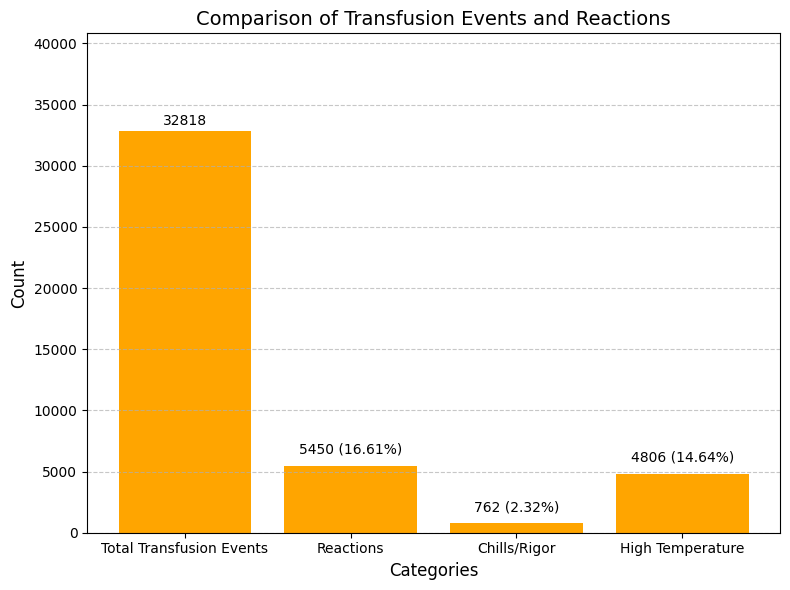

In [41]:
import matplotlib.pyplot as plt

# Data
values = [32818, 5450, 762, 4806]
categories = ['Total Transfusion Events', 'Reactions', 'Chills/Rigor', 'High Temperature']  # Define the categories

# Calculate the percentages
percent_reactions_1 = (values[1] / values[0]) * 100
percent_reactions_2 = (values[2] / values[0]) * 100
percent_reactions_3 = (values[3] / values[0]) * 100

# Visualization with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color='orange')
plt.title('Comparison of Transfusion Events and Reactions', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.ylim(0, max(values) + 8000)  # Adding space above for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values and percentages on top of the bars
for i, v in enumerate(values):
    if i == 1:  # Reactions
        plt.text(i, v + 1000, f"{v} ({percent_reactions_1:.2f}%)", ha='center', fontsize=10)
    elif i == 2:  # Chills/Rigor
        plt.text(i, v + 1000, f"{v} ({percent_reactions_2:.2f}%)", ha='center', fontsize=10)
    elif i == 3:  # High Temperature
        plt.text(i, v + 1000, f"{v} ({percent_reactions_3:.2f}%)", ha='center', fontsize=10)
    else:  # Total Transfusion Events
        plt.text(i, v + 500, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


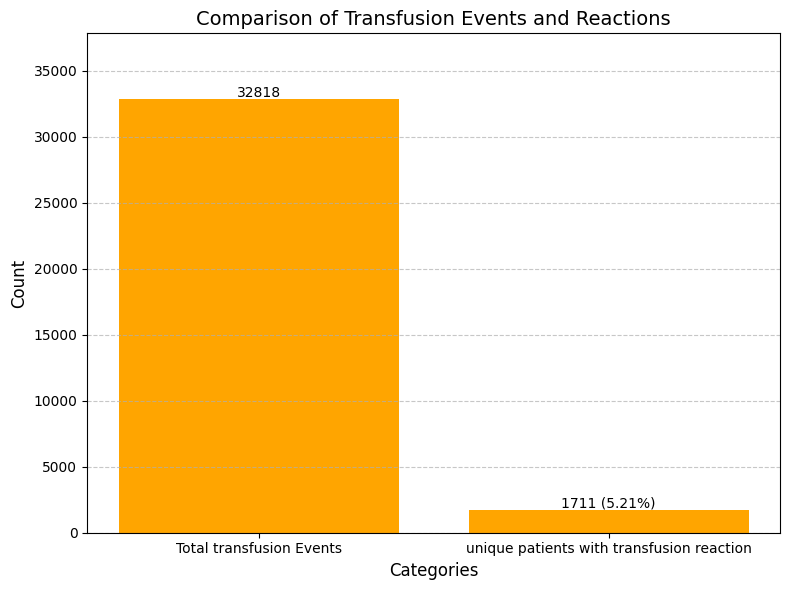

In [24]:
values = [32818, 1711]

# Calculate the percentage of transfusion reactions
percent_reactions = (values[1] / values[0]) * 100
categories = ['Total transfusion Events', 'unique patients with transfusion reaction']  # Define the categories
# Visualization with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color='orange')
plt.title('Comparison of Transfusion Events and Reactions', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.ylim(0, max(values) + 5000)  # Adding some space above the highest value for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values and percentages on top of the bars
for i, v in enumerate(values):
    if i == 1:  # Add percentage for reactions
        plt.text(i, v + 200, f"{v} ({percent_reactions:.2f}%)", ha='center', fontsize=10)
    else:
        plt.text(i, v + 200, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



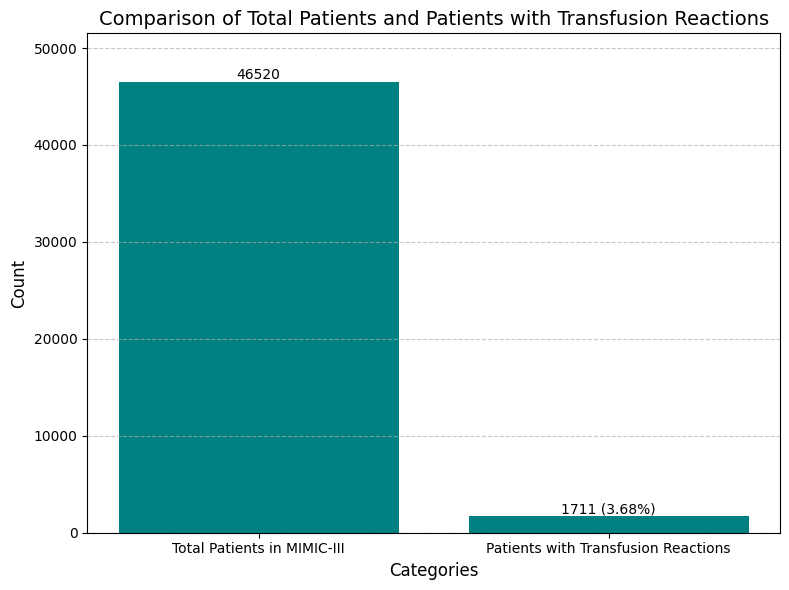

In [16]:
# Updated data with patient counts
categories = ['Total Patients in MIMIC-III', 'Patients with Transfusion Reactions']
values = [46520, 1711]

# Visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color='teal')
plt.title('Comparison of Total Patients and Patients with Transfusion Reactions', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.ylim(0, max(values) + 5000)  # Adding space above the highest value
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values and percentages on top of the bars
percent_reactions_patients = (values[1] / values[0]) * 100
for i, v in enumerate(values):
    if i == 1:  # Add percentage for patients with reactions
        plt.text(i, v + 300, f"{v} ({percent_reactions_patients:.2f}%)", ha='center', fontsize=10)
    else:
        plt.text(i, v + 300, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


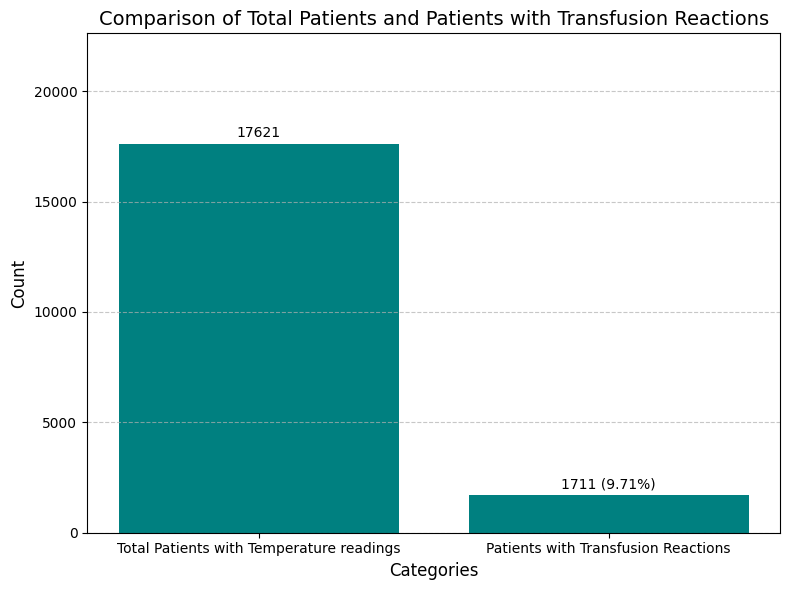

In [23]:


# Updated data with patient counts
categories = ['Total Patients with Temperature readings', 'Patients with Transfusion Reactions']
values = [17621, 1711]

# Visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color='teal')
plt.title('Comparison of Total Patients and Patients with Transfusion Reactions', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.ylim(0, max(values) + 5000)  # Adding space above the highest value
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values and percentages on top of the bars
percent_reactions_patients = (values[1] / values[0]) * 100
for i, v in enumerate(values):
    if i == 1:  # Add percentage for patients with reactions
        plt.text(i, v + 300, f"{v} ({percent_reactions_patients:.2f}%)", ha='center', fontsize=10)
    else:
        plt.text(i, v + 300, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


4806